In [1]:
# Code to plot the HI Mass as a function of Halo Mass (Mvir)
# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from dragons import meraxes, munge
import random
import sys
from Functions import *

#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)

snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = str(round(redshift_used, 1)) # round float to nearest whole int

# Take a random sample of gals (k = 10^4)
#gals_ran = Random_Sample_Gals(gals, 10000)
gals_ran = gals.sample(n=10000)
gals_ran
#gals_ran.shape

,HaloID,ID,Type,CentralGal,GhostFlag,Len,MaxLen,Spin,Mvir,Rvir,...,Pos_1,Pos_2,Vel_0,Vel_1,Vel_2,NewStars_0,NewStars_1,NewStars_2,NewStars_3,NewStars_4
175487,154129,460001366687,2,178597,0,52,1346,0.042960,0.984590,0.037490,...,92.553360,126.384392,-135.220612,-25.730875,-889.314087,6.463381e-06,6.845695e-06,7.259453e-06,7.707920e-06,8.194931e-06
158952,21403,1560002603856,2,87828,0,32,54,0.021020,0.605902,0.019323,...,151.896729,120.907028,-104.439354,-92.442413,-223.793182,3.330727e-07,3.437085e-07,3.547831e-07,3.663155e-07,3.783329e-07
1122788,795309,1460000795309,0,1122788,0,68,71,0.015114,1.287541,0.040835,...,9.389956,86.512299,-303.336945,-21.836788,219.590118,2.062586e-05,1.061114e-05,7.272285e-05,2.432655e-05,1.583071e-05
363555,93695,1090002233807,2,334587,0,34,135,0.061509,0.643771,0.023735,...,130.814041,15.404517,-322.908142,-18.420515,-24.378351,3.948393e-06,4.037108e-06,4.128148e-06,4.221546e-06,4.317410e-06
631040,196496,690000196496,0,631040,0,2855,2961,0.041327,54.057793,0.141926,...,79.144203,162.247147,-62.812878,369.926575,-623.325195,5.128423e-03,6.536925e-03,7.085164e-03,8.305098e-03,7.773647e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289186,751523,1130000751523,0,289186,0,62,233,0.026220,1.173935,0.039597,...,5.895047,118.974472,193.027878,-195.166275,3.888728,1.508130e-06,6.964598e-06,5.964535e-06,7.684232e-06,7.891947e-06
615813,154126,1830001617737,2,558551,0,70,77,0.048830,1.325410,0.039742,...,144.941299,22.398169,-458.500610,172.238144,175.241516,9.422540e-06,9.584387e-06,9.748993e-06,9.916303e-06,1.008644e-05
359076,82627,1040001811307,2,333670,0,36,108,0.017537,0.681639,0.029556,...,25.307310,159.874603,-539.136169,416.801666,-0.151932,4.278814e-07,4.501862e-07,4.740900e-07,4.997353e-07,0.000000e+00
1285051,1047302,1720001047302,0,1285051,0,44,48,0.039691,0.833115,0.035319,...,99.763756,117.089737,632.211487,-506.983063,-132.406357,2.309101e-06,3.219682e-06,3.311848e-06,9.621052e-06,5.771766e-06


In [2]:
# Log the masses 
HIMass = np.log10(gals_ran["HIMass"]*1e10)
print('HIMass: ', HIMass, 'no. items: ', HIMass.shape)
Mvir = np.log10(gals_ran["Mvir"]*1e10)
print('Mvir: ', Mvir, 'no. items: ', HIMass.shape)
Type = gals_ran["Type"]

HIMass:  175487     7.162688
158952     6.128418
1122788    7.179318
363555     7.343122
631040     9.426548
             ...   
289186     6.725074
615813     7.839858
359076     6.035780
1285051    7.411259
234376     6.412933
Name: HIMass, Length: 10000, dtype: float32 no. items:  (10000,)
Mvir:  175487      9.993256
158952      9.782402
1122788    10.109761
363555      9.808731
631040     11.732859
             ...    
289186     10.069644
615813     10.122351
359076      9.833554
1285051     9.920705
234376      9.795766
Name: Mvir, Length: 10000, dtype: float32 no. items:  (10000,)


/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


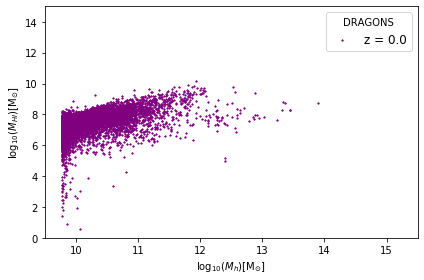

In [6]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + redshift_used)
x = Mvir
y = HIMass
plot = ax.scatter(x, y, color= "purple", marker= "*", s=2, label=label_z)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylim([0,15])
ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend(title=("DRAGONS"),
           loc='upper right',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir")
plt.savefig("plots/" + name_of_plot + ".pdf")

"\noccurrences_cen = np.count_nonzero(Type == 0)\noccurrences_sat = np.count_nonzero(Type == 1)\noccurrences_all = np.count_nonzero(gals)\nprint('Num Centrals = ', occurrences_cen)\nprint('Num Satellites = ', occurrences_sat)\nprint('Num All = ', occurrences_all)\n"

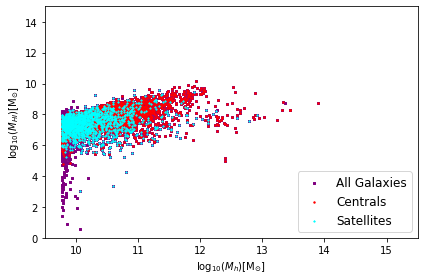

In [9]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + str(redshift_used))
x = Mvir
y = HIMass
all_plt = ax.scatter(x, y, color= "purple", marker= "s", s=2)  
centrals_plt = ax.scatter(x[Type==0], y[Type==0], color= "red", marker= "o", s=2)  
satellites_plt = ax.scatter(x[Type==1], y[Type==1], color= "cyan", marker= "*", s=2)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylim([0,15])
ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend((all_plt, centrals_plt, satellites_plt),
           ('All Galaxies', 'Centrals', 'Satellites'),
           scatterpoints=1,
           loc='lower right',
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir_CenSatAll")
plt.savefig("plots/" + name_of_plot + ".pdf")
'''
occurrences_cen = np.count_nonzero(Type == 0)
occurrences_sat = np.count_nonzero(Type == 1)
occurrences_all = np.count_nonzero(gals)
print('Num Centrals = ', occurrences_cen)
print('Num Satellites = ', occurrences_sat)
print('Num All = ', occurrences_all)
'''